# Sebastián González Juárez
## Tarea 4

# 3. 1,2,3

Importar datos de Scikit-learn

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target # 0 = Benigno, 1 = Maligno
print(df.head(), df.tail)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

matriz de dispersión

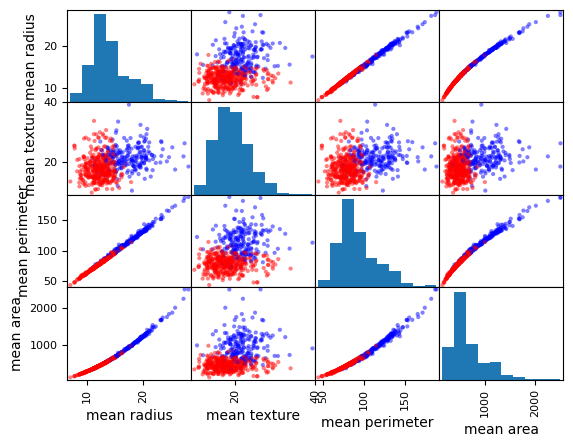

In [2]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(df.iloc[:, :4], c=df['target'], cmap='bwr')
plt.show()

correlaciones lineales de Pearson

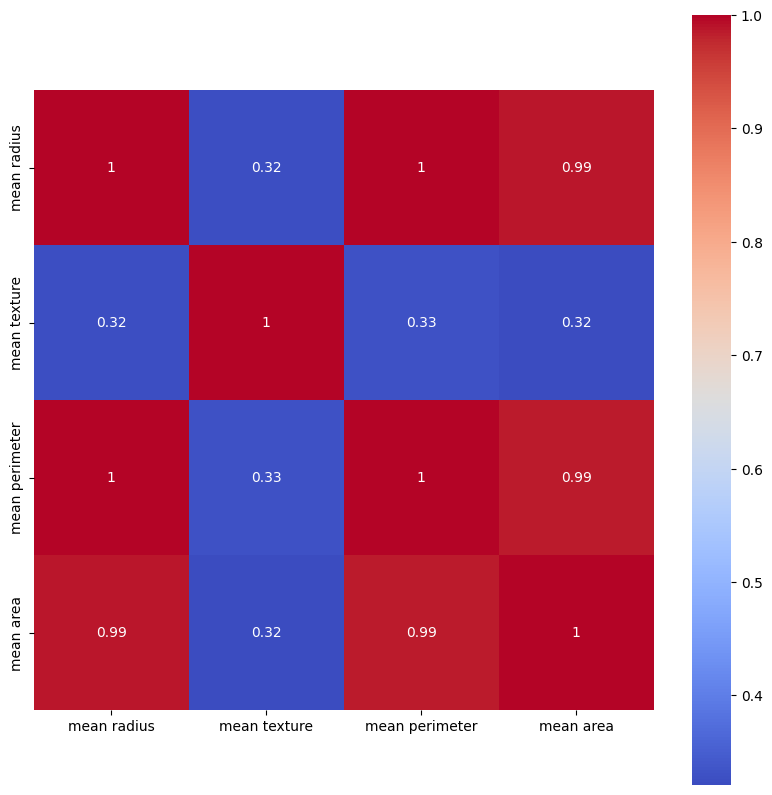

In [3]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(df.iloc[:, 0:4].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

correlaciones de Spearman

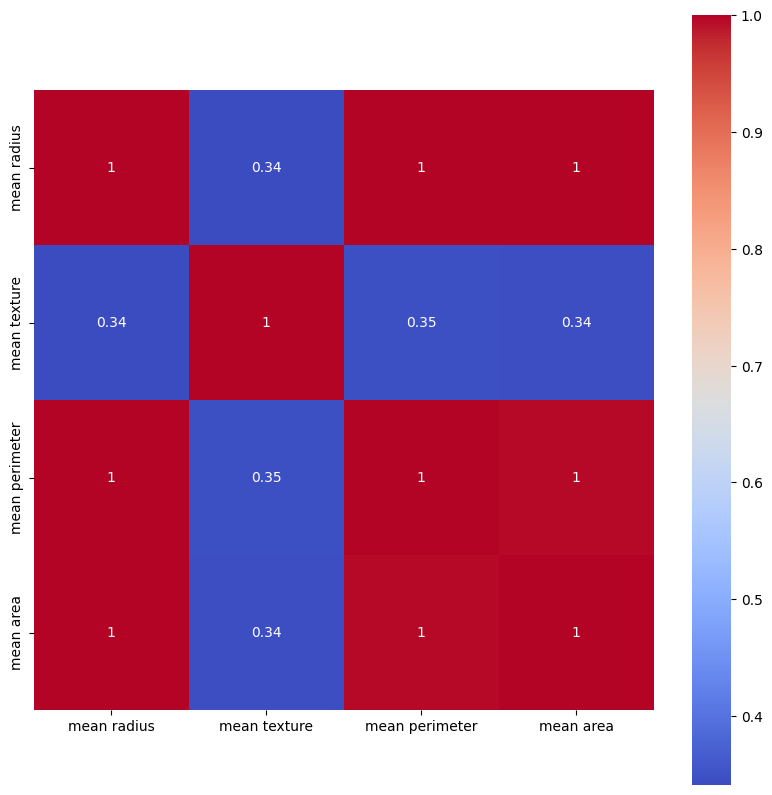

In [4]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.iloc[:, 0:4].corr("spearman"), annot=True, square=True, cmap='coolwarm')
plt.show()

matriz de confusión con ejemplo en cm

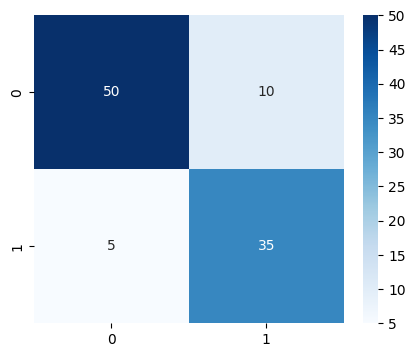

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = [[50, 10], [5, 35]]
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

# 3.4 Estudio del umbral

Para evaluar qu ́e tan bien sirven estas variables para predecir el diagn ́ostico,
seguimos una estrategia de valor de umbral.

1. Seleccionar tres variables del conjunto con diferente correlaci ́on con el
diagn ́ostico: una de alta correlaci ́on, una de correlaci ́on media y una de
baja correlaci ́on. Para ello calcula la matriz de correlaci ́on y ordena los
valores en orden descendente. Puedes usar df.corr()[[’target’]] para
obtener la correlaci ́on de todas las variables con el diagn ́ostico (target).

Imprimamos la matriz de las correlaciones para tener mejor visión.

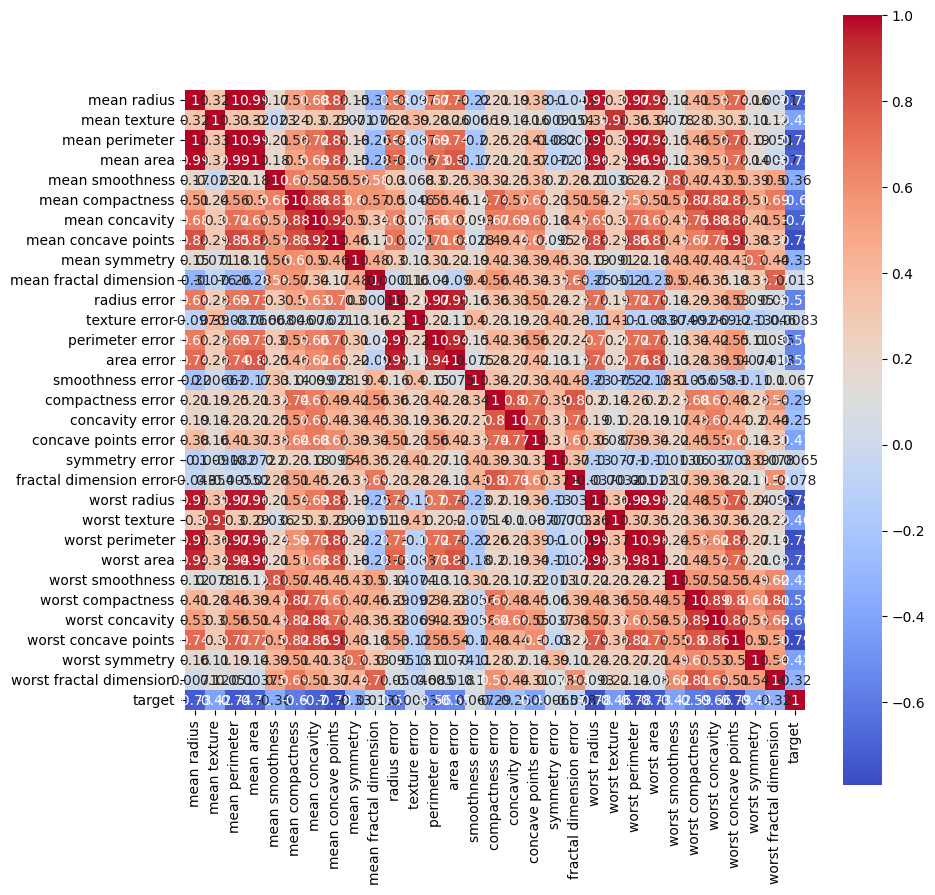

In [6]:
plt.figure(figsize=(10, 10))
#imprime la matriz de correlación
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

Fijemonos en los valores que le corresponden a target.

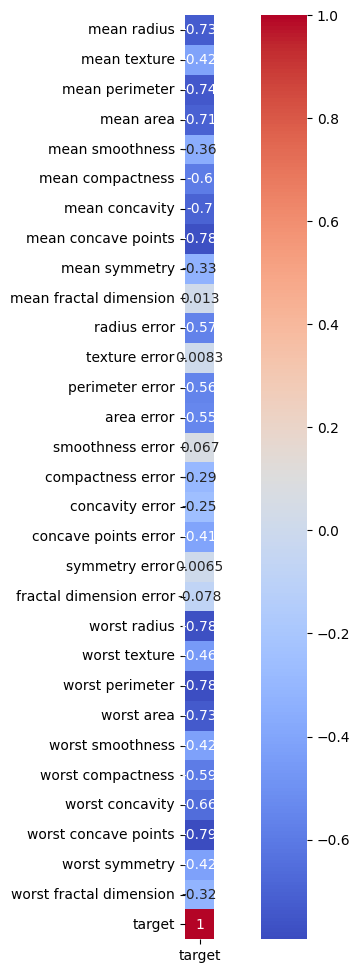

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr()[['target']], annot=True, square=True, cmap='coolwarm')
plt.show()

Veamos a más detalle la columna de correlación que corresponde a target y ordenenemosla de forma descendente.


In [8]:
correlacion = df.corr()
print(correlacion["target"].sort_values(ascending=False))

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

Elegire el mayor, el menor y un random.

In [9]:
import random
features = {col: i for i, col in enumerate(df.columns)}
feature_list = list(features.keys())
random_feature = random.choice(feature_list)
random_feature

'mean concavity'

así que tenemos: smoothness error, worst concave points, random_feature. Evidentemente si sale target u otro de los dos de interes pues vuelve a correr el random.

2. Estudia las tres variables, puedes usar df[’VARIABLE’].describe()) para
analizar su distribuci ́on y valores estad ́ısticos.

In [10]:
df["smoothness error"].describe()

,smoothness error
count,569.000000
mean,0.007041
std,0.003003
min,0.001713
25%,0.005169
50%,0.006380
75%,0.008146
max,0.031130


In [11]:
df["worst concave points"].describe()

,worst concave points
count,569.000000
mean,0.114606
std,0.065732
min,0.000000
25%,0.064930
50%,0.099930
75%,0.161400
max,0.291000


In [12]:
df[random_feature].describe()

,mean concavity
count,569.000000
mean,0.088799
std,0.079720
min,0.000000
25%,0.029560
50%,0.061540
75%,0.130700
max,0.426800


3. Dibuja las variables para tumores malignos y benignos, y usa la estimaci ́on
de densidad de kernel (KDE) para visualizar su distribuci ́on.

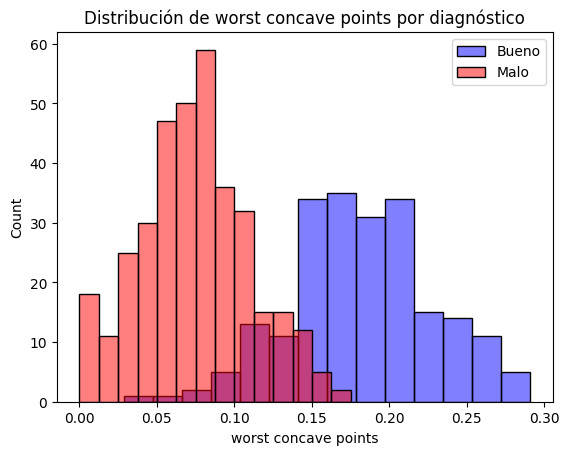

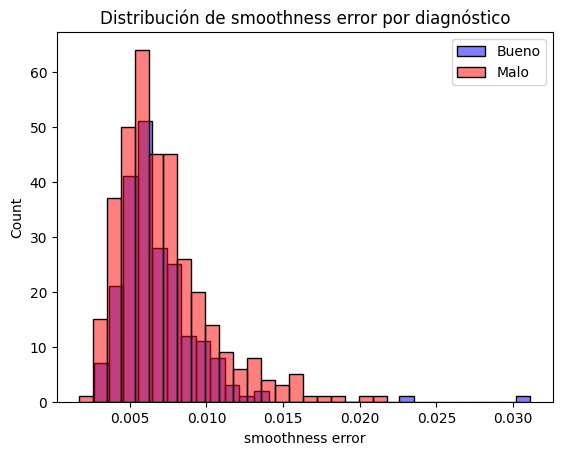

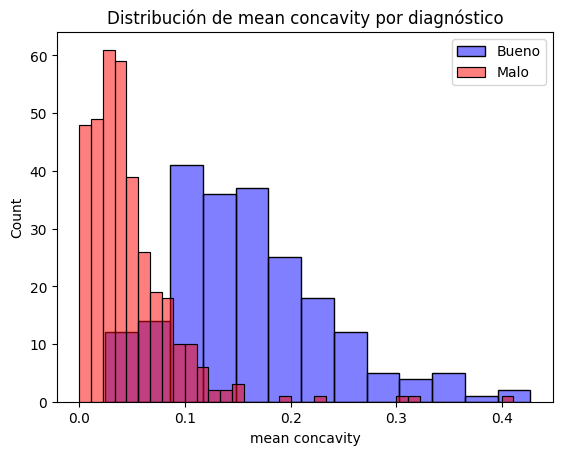

In [13]:
variables = ["worst concave points", "smoothness error", random_feature]
for variable in variables:
    sns.histplot(df[df["target"]==0][variable], alpha=0.5, label="Bueno", color="blue")
    sns.histplot(df[df["target"]==1][variable], alpha=0.5, label="Malo", color="red")
    plt.title(f"Distribución de {variable} por diagnóstico")
    plt.xlabel(variable)
    plt.legend()
    plt.show()

Con la estimación de densidad de kernel (KDE) vamos a visualizar su distribución.

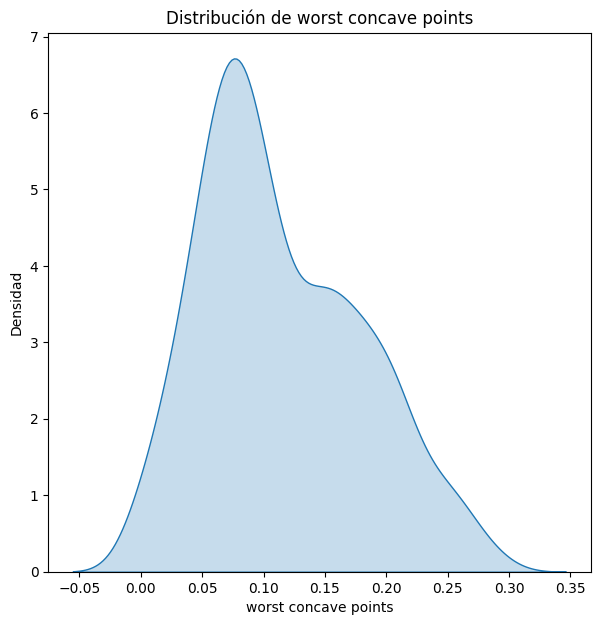

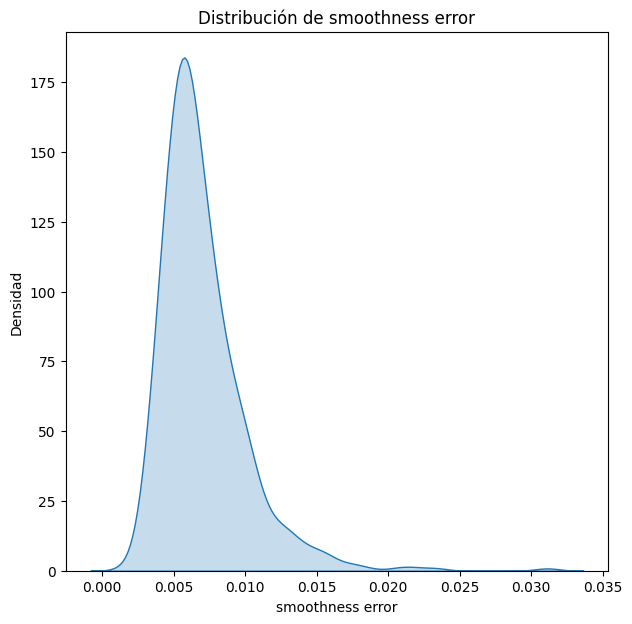

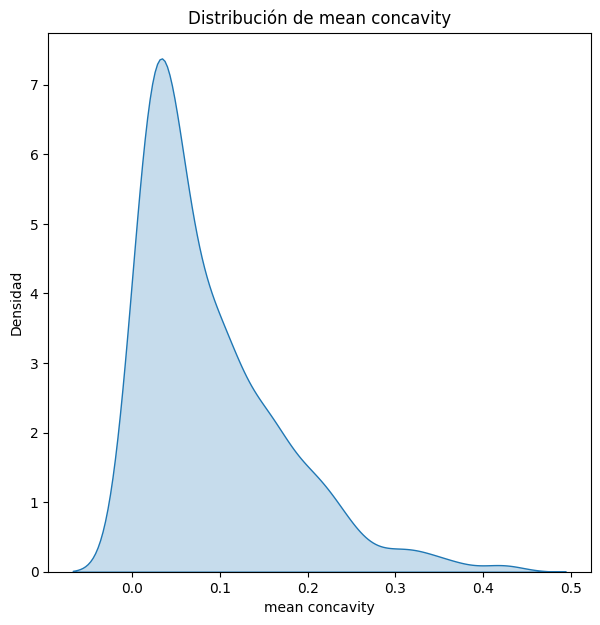

In [14]:
for variable in variables:
  plt.figure(figsize=(7, 7))
  sns.kdeplot(df[variable], fill=True)
  plt.title(f"Distribución de {variable}")
  plt.xlabel(variable)
  plt.ylabel("Densidad")
  plt.show()

4. El siguiente paso es evaluar qu ́e tan bien predicen si un tumor es Maligno
(M) o Benigno (B). Para hacerlo de manera sencilla, podemos comparar

esta variable con el diagn ́ostico real (target) y calcular la matriz de con-
fusi ́on y las metricas.

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [16]:
thresholds = {"worst concave points":df["worst concave points"].mean(),"smoothness error": df["smoothness error"].mean(),random_feature: df[random_feature].mean()}


Matriz de Confusión para worst concave points:
 [[ 16 196]
 [312  45]]
Métricas para worst concave points:
- Exactitud: 0.10720562390158173
- Precisión: 0.18672199170124482
- Sensibilidad: 0.12605042016806722
- Puntuación F1: 0.1505016722408027



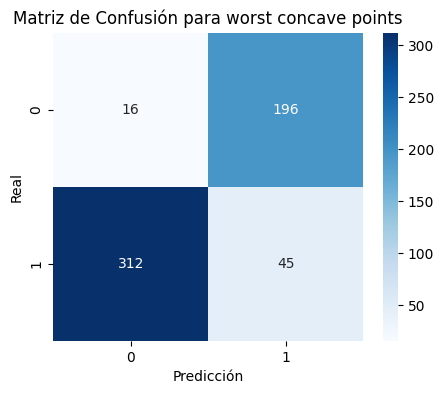

Matriz de Confusión para smoothness error:
 [[141  71]
 [207 150]]
Métricas para smoothness error:
- Exactitud: 0.5114235500878734
- Precisión: 0.6787330316742082
- Sensibilidad: 0.42016806722689076
- Puntuación F1: 0.5190311418685121



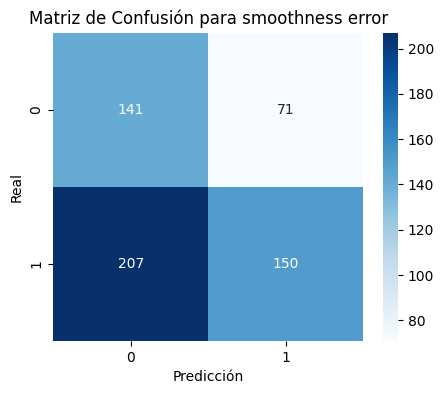

Matriz de Confusión para mean concavity:
 [[ 28 184]
 [319  38]]
Métricas para mean concavity:
- Exactitud: 0.11599297012302284
- Precisión: 0.17117117117117117
- Sensibilidad: 0.10644257703081232
- Puntuación F1: 0.13126079447322972



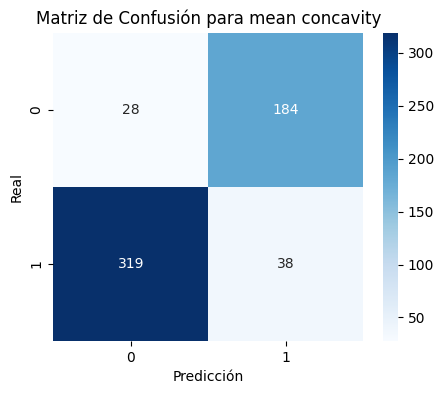

In [17]:
for variable in variables:
    predictions = (df[variable] > thresholds[variable]).astype(int)

    cm = confusion_matrix(df['target'], predictions)
    print(f"Matriz de Confusión para {variable}:\n", cm)

    accuracy = accuracy_score(df['target'], predictions)
    precision = precision_score(df['target'], predictions)
    recall = recall_score(df['target'], predictions)
    f1 = f1_score(df['target'], predictions)

    print(f"Métricas para {variable}:")
    print(f"- Exactitud: {accuracy}")
    print(f"- Precisión: {precision}")
    print(f"- Sensibilidad: {recall}")
    print(f"- Puntuación F1: {f1}\n")

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión para {variable}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

5. Escoge ”a ojo” un valor de umbral para cada variable que te ayudar ́a a
clasificar los tumores como malignos (M = 1) o benignos (B = 0).

Acá murio la idea del random xd, la primera vez que lo hice fue con radius error. Establecere ese.
Podría ser como en 3.4 que agarra el promedio, pero vamos a hacerlo al ojo.

In [18]:
df["radius error"].describe()

,radius error
count,569.000000
mean,0.405172
std,0.277313
min,0.111500
25%,0.232400
50%,0.324200
75%,0.478900
max,2.873000


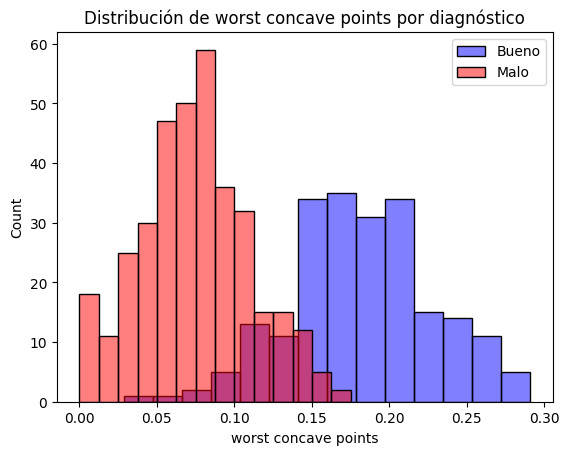

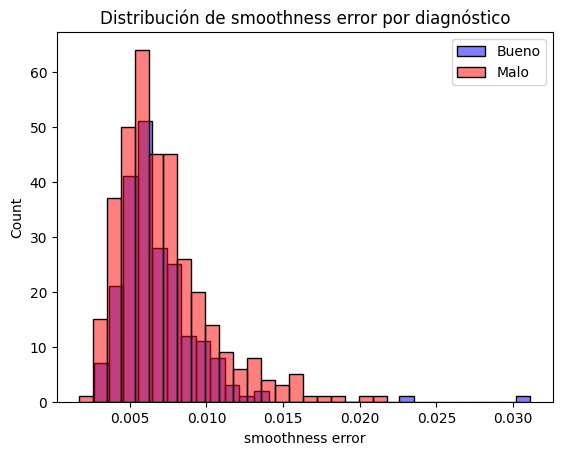

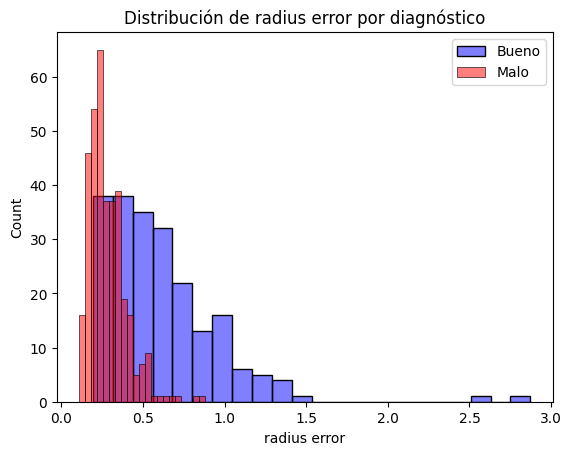

In [19]:
variables = ["worst concave points", "smoothness error", "radius error"]
for variable in variables:
    sns.histplot(df[df["target"]==0][variable], alpha=0.5, label="Bueno", color="blue")
    sns.histplot(df[df["target"]==1][variable], alpha=0.5, label="Malo", color="red")
    plt.title(f"Distribución de {variable} por diagnóstico")
    plt.xlabel(variable)
    plt.legend()
    plt.show()

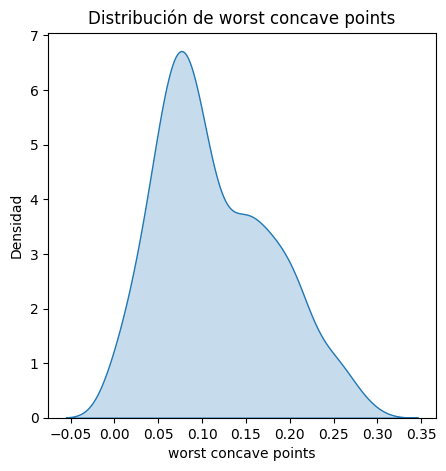

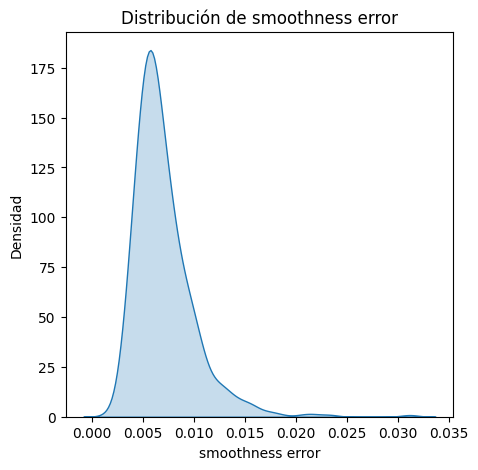

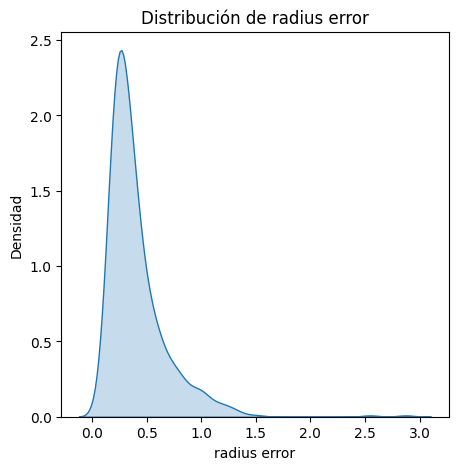

In [20]:
for variable in variables:
  plt.figure(figsize=(5, 5))
  sns.kdeplot(df[variable], fill=True)
  plt.title(f"Distribución de {variable}")
  plt.xlabel(variable)
  plt.ylabel("Densidad")
  plt.show()

Escojamos el umbral para las 3 variables elegidas.

In [21]:
umbral= {'worst concave points' : 0.15, 'smoothness error' : 0.005, 'radius error' : 0.5}

6. Ahora asigna etiquetas de clasificaci ́on o predicci ́on, esto significa que
definas un df[’prediction’] tal que: si el valor de variable es menor
o igual al umbral, predice M (Maligno). Si el valor de variable es mayor
al umbral, predice B (Benigno).

In [22]:
for variable in variables:
  df[f'prediction_{variable}'] = (df[variable] < umbral[variable]).astype(int)

7. Imprime las primeras 30 filas con los valores reales del diagn ́ostico y las
predicciones generadas. Por qu ́e hay casos con target = 0 (Benigno) que
tienen prediction = 1 (Maligno)?

In [23]:
for variable in variables:
  print(f"\n Para {variable} \n",df[[variable, 'target', f'prediction_{variable}']].head(30))


 Para worst concave points 
     worst concave points  target  prediction_worst concave points
0                0.26540       0                                0
1                0.18600       0                                0
2                0.24300       0                                0
3                0.25750       0                                0
4                0.16250       0                                0
5                0.17410       0                                0
6                0.19320       0                                0
7                0.15560       0                                0
8                0.20600       0                                0
9                0.22100       0                                0
10               0.09975       0                                1
11               0.18100       0                                0
12               0.17670       0                                0
13               0.11190       0              

Observamos que el diagnóstico y la predicción no siempre coinciden. Esto se debe a que la predicción se basa únicamente en un umbral que definí intuitivamente para distinguir entre casos benignos y malignos. Sin embargo, ese valor se encuentra en una zona donde hay tanto diagnósticos positivos como negativos. Además, sin considerar los resultados del error de suavizado, cuyos valores presentan una cantidad similar de diagnósticos positivos y negativos

8. Define FP: casos donde el target real es 0 (Benigno) pero la predicci ́on es
1 (Maligno). Define FN: casos donde el target real es 1 (Maligno) pero la predicci ́on es 0 (Benigno). Cu ́entalos y encuentra cuantas predicciones
fallaron?

In [24]:
for variable in variables:
  df[f'prediction_{variable}'] = (df[variable] < umbral[variable]).astype(int)
  FN = df[(df['target'] == 1) & (df[f'prediction_{variable}'] == 0)]
  FP = df[(df['target'] == 0) & (df[f'prediction_{variable}'] == 1)]
  TN = df[(df['target'] == 0) & (df[f'prediction_{variable}'] == 0)]
  TP = df[(df['target'] == 1) & (df[f'prediction_{variable}'] == 1)]
  print(f"Para {variable}:")
  print("FN:", len(FN))
  print("FP:", len(FP))
  print("TP:", len(TP))
  print("TN:", len(TN))
  print("\n")

Para worst concave points:
FN: 7
FP: 47
TP: 350
TN: 165


Para smoothness error:
FN: 277
FP: 47
TP: 80
TN: 165


Para radius error:
FN: 19
FP: 95
TP: 338
TN: 117




9. Dibuja la matriz de confusi ́on completa.

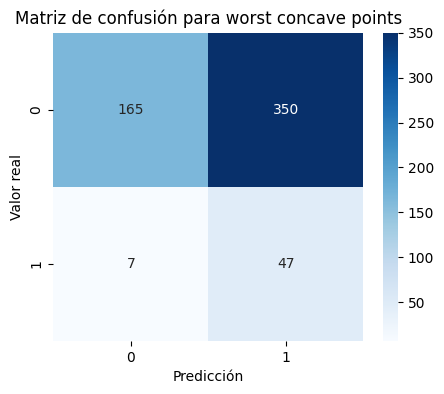

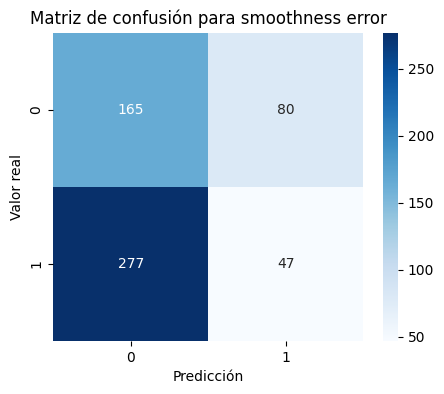

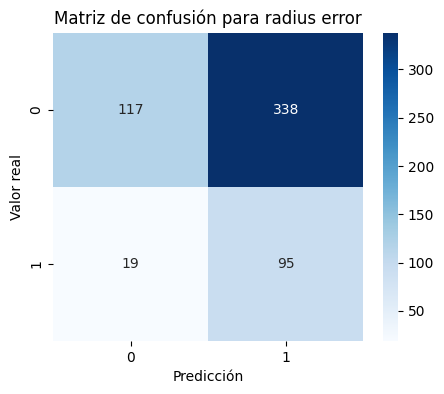

In [25]:
#Mostramos la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

for variable in variables:
  df[f'prediction_{variable}'] = (df[variable] < umbral[variable]).astype(int)

  FN = df[(df['target'] == 1) & (df[f'prediction_{variable}'] == 0)]
  FP = df[(df['target'] == 0) & (df[f'prediction_{variable}'] == 1)]
  TN = df[(df['target'] == 0) & (df[f'prediction_{variable}'] == 0)]
  TP = df[(df['target'] == 1) & (df[f'prediction_{variable}'] == 1)]

  cm = [[len(TN), len(TP)], [len(FN), len(FP)]]
  plt.figure(figsize=(5,4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title(f"Matriz de confusión para {variable}")
  plt.xlabel("Predicción")
  plt.ylabel("Valor real")
  plt.show()

10. Evalua todas las 4 metricas que apenas vimos. Tu modelo es confiable?

In [26]:
for variable in variables:
  # Calcula la predicción para la variable actual
  accuracy = accuracy_score(df['target'], df[f'prediction_{variable}'])
  precision = precision_score(df['target'], df[f'prediction_{variable}'])
  recall = recall_score(df['target'], df[f'prediction_{variable}'])
  f1 = f1_score(df['target'], df[f'prediction_{variable}'])
  print(f"Para {variable}:")
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)
  print("\n")

Para worst concave points:
Accuracy: 0.9050966608084359
Precision: 0.8816120906801007
Recall: 0.9803921568627451
F1 Score: 0.9283819628647215


Para smoothness error:
Accuracy: 0.4305799648506151
Precision: 0.6299212598425197
Recall: 0.22408963585434175
F1 Score: 0.3305785123966942


Para radius error:
Accuracy: 0.7996485061511424
Precision: 0.7806004618937644
Recall: 0.9467787114845938
F1 Score: 0.8556962025316456




El escenario ideal sería que la precisión, la exactitud, el recall y el F1 estuvieran aproximadamente iguales a 1.
Vemos que dos de las tres variables, las métricas son inferiores a 0.9, lo que nos impide considerar el modelo como completamente confiable.


11. Para probar diferentes valores de umbral, necesitamos graficar la ”Precision-
Recall Curve” para ver el mejor punto de equilibrio:

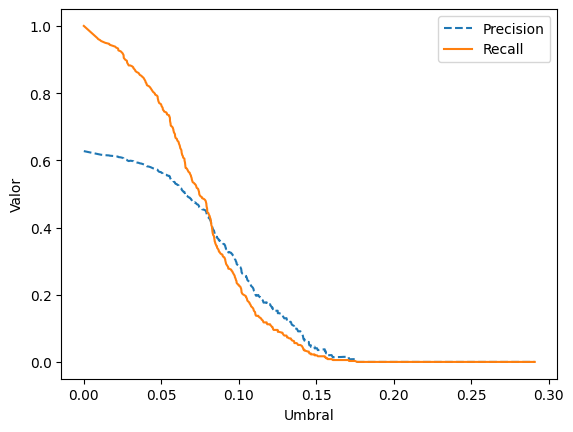

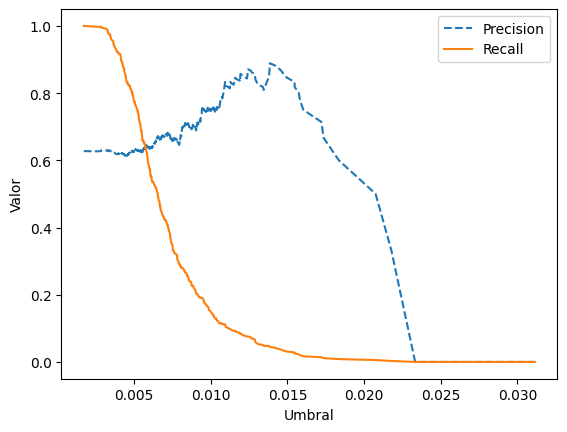

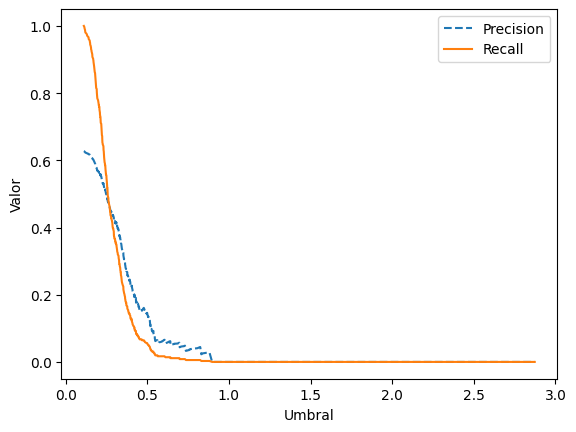

In [27]:
from sklearn.metrics import precision_recall_curve
for variable in variables:
  true = df['target']
  var = df[variable]
  precision, recall, thresholds = precision_recall_curve(true, var)
  plt.plot(thresholds, precision[:-1], label="Precision", linestyle="--")
  plt.plot(thresholds, recall[:-1], label="Recall")
  plt.xlabel("Umbral")
  plt.ylabel("Valor")
  plt.legend()
  plt.show()

Primera: El recall cae abruptamente con pequeños aumentos en el umbral, lo que indica que la variable no separa bien las clases. La precisión mejora, pero a costa de un recall muy bajo.

Segunda: Tanto la precisión como el recall muestran fluctuaciones, lo que sugiere que la variable no sigue algún patrón claro y no sería muy confiable para distinguir entre tumores benignos y malignos.

Tercera: La precisión aumenta con el umbral, pero el recall cae rápidamente, dejando pocos valores intermedios donde ambas métricas sean equilibradas. Podríamos interpretar que la variable tiene cierta capacidad de discriminación.